<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_guide_03_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01 정확도 (Accuracy)

$ 정확도(accuracy) = \dfrac {예측 결과가 동일한 데이터 건수} {전체 예측 데이터 건수}$



In [12]:
from sklearn.base import BaseEstimator
import numpy as np


class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass

  # predict() 메서드는 단순히 Sex 피처가 남자(1)면 0, 여자(0)면 1로 예측
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]) :
      if(X['Sex'].iloc[i] = 1) :
        pred[i] = 0
      else :
        pred[i] = 1
    return pred

SyntaxError: ignored

#### MNIST 데이터 세트를 이용하여 값이 7인것만 True, 나머지 숫자는 모두 False로 변환 한 이진 분류 문제

![mnist-binary-classfi](https://user-images.githubusercontent.com/291782/138015598-e638a983-4c43-4df0-af89-36c2c647bcb6.png)


**정확도 평가 지표의 맹점**

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    def fit(self, X, y) :
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
    def predict(self, X) :
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits() 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True이고 이를 astype(int)로 1로 변환
# 7 이 아니면 False 이고 0으로 변환
y = (digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

# 불균형한 레이블 데이터 세트 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습 / 예측 / 정확도 평가
fake_clf = MyFakeClassifier()
fake_clf.fit(x_train, y_train)
fake_pred = fake_clf.predict(x_test)
print('\n 모든 예측을 0으로 하여도 정확도는:{0:.3f}'.format(accuracy_score(y_test, fake_pred)))



레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포
0    405
1     45
dtype: int64

 모든 예측을 0으로 하여도 정확도는:0.900


## 02 오차행렬 (Confusion Matrix)

![confusion-matrix-02](https://user-images.githubusercontent.com/291782/138031897-d991171d-369f-4662-900f-1cffacb38d9c.png)


In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fake_pred)

array([[405,   0],
       [ 45,   0]])

위의 표시된 confusion_matrix() 값이 위 이미지와 동일한 위치이다.
- TN : array[0,0]으로 405
- FP : array[0,1] 으로 0
- FN : array[1,0] 으로 45
- TP : array[1,1] 으로 0

정밀도 (Precision) = TP / (TP + FP)

재현율 (Recall) = TP / (TP + FN) = 민감도(Sensitivity) = TPR (True Positive Rate)

재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- 예) 암판단 모델 (암:Positive, 암X:Negative) : 암인데 암이 아닌것으로 판단하면 생명을 앗아감 
- 암이 아닌것을 암으로 판단한 경우는 다시 한 번 재검사 하는 수준의 비용만 발생


정밀도가 중요한 지표인 경우 (실제 Negative 음성인 데이터 예측을, Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향)
- 예) 스팸메일 : 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편을 느끼는 정도지만,
- 실제 Negative 인 일반 메일을 Positive인 스팸 메일로 분류할 경우 메일을 받지 못해 업무에 차질이 생김



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import *

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도(accuracy):{0:.4f}, 정밀도(precision):{1:.4f}, 재현율(recall):{2:.4f}'.format(accuracy, precision, recall))


# null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
 
  return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

  return df


# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1] # 앞자리 대문자 1자리만 잘라내기
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df


# 앞에서 설정한  데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')
y_df = df['Survived']
x_df = df.drop('Survived', axis = 1)
x_df = transform_features(x_df)
print(x_df)


x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 11)

lr = LogisticRegression()

lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print('\n\n## 오차행렬, 정확도, 정밀도, 재현율 등 출력 ##\n')
get_clf_eval(y_test, pred)


     Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500      7         3
1         1    0  38.000000      1      0  71.2833      2         0
2         3    0  26.000000      0      0   7.9250      7         3
3         1    0  35.000000      1      0  53.1000      2         3
4         3    1  35.000000      0      0   8.0500      7         3
..      ...  ...        ...    ...    ...      ...    ...       ...
886       2    1  27.000000      0      0  13.0000      7         3
887       1    0  19.000000      0      0  30.0000      1         3
888       3    0  29.699118      1      2  23.4500      7         3
889       1    1  26.000000      0      0  30.0000      2         0
890       3    1  32.000000      0      0   7.7500      7         2

[891 rows x 8 columns]


## 오차행렬, 정확도, 정밀도, 재현율 등 출력 ##

오차 행렬
[[104  14]
 [ 13  48]]
정확도(accuracy):0.8492, 정밀도(precision):0.7742, 재현율(recall):0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 정밀도와 재현율 트레이드 오프(trade-off)

일반적으로 이진 분류에서는 임곗값(예측확률)을 0.5, 즉 50%로 정하고 기준값 보다 크면 Positive, 작으면 Negative로 결정함

**predict_proba()** : 예측 확률 변환 메서드
- 입력 파라미터 : predict() 메서드와 동일하게 보통 테스트 피처 데이터 세트를 입력
- 반환 값
 - 개별 클래스와 예측확률을 ndarray m x n (m:입력 값의 레코드 수, n: 클래스 값 유형) 형태로 반환
 - 입력 테스트 데이터 세트의 표본수가 100개이고 예측 클래스 값 유형이 2개(이진분류)라면 반환 값은 100 x 2 ndarray 임
 - 각 열은 개별 클래스의 예측 확률임. 이진 분류에서 첫 번째 컬럼은 0 Negative 확률, 두번째 컬럼은 1 Positive 확률임

In [16]:
pred_proba = lr.predict_proba(x_test)
pred = lr.predict(x_test)
print('pred() 결과:', pred.shape)
print('pred array에서 앞 3개만 추출:\n', pred[:3])
print('\n')
print('pred_proba() 결과:', pred_proba.shape)
print('pred_proba array에서 앞 3개만 추출:\n', pred_proba[:3])

print('\n')
# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred() 결과: (179,)
pred array에서 앞 3개만 추출:
 [1 0 0]


pred_proba() 결과: (179, 2)
pred_proba array에서 앞 3개만 추출:
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]


두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


#### Binarizer 클래스 사용법

In [17]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정 값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 컬럼, 즉 Positve 클래스 컬럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도(accuracy):0.8492, 정밀도(precision):0.7742, 재현율(recall):0.7869


#### 임곗값을 0.4에서 부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import *

# 테스트를 위해 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds :
        print('\n ######################')
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predcit = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        confusion = confusion_matrix(y_test, custom_predcit)
        accuracy = accuracy_score(y_test, custom_predcit)
        precision = precision_score(y_test, custom_predcit)
        recall = recall_score(y_test, custom_predcit)
        print('오차 행렬')
        print(confusion)
        print('정확도(accuracy):{0:.4f}, 정밀도(precision):{1:.4f}, 재현율(recall):{2:.4f}'.format(accuracy, precision, recall))

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


 ######################
임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도(accuracy):0.8324, 정밀도(precision):0.7183, 재현율(recall):0.8361

 ######################
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도(accuracy):0.8492, 정밀도(precision):0.7656, 재현율(recall):0.8033

 ######################
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도(accuracy):0.8492, 정밀도(precision):0.7742, 재현율(recall):0.7869

 ######################
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도(accuracy):0.8659, 정밀도(precision):0.8364, 재현율(recall):0.7541

 ######################
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도(accuracy):0.8771, 정밀도(precision):0.8824, 재현율(recall):0.7377


#### precision_recall_curve() 
- 입력 파라미터
 - y_true : 실제 클래스값 배열( 배열크기 = [데이터 건수])
 - probas_pred : Positive 컬럼의 예측 확률 배열( 배열크기 = [데이터 건수])
- 반환 값
 - 정밀도 : 임곗값별 정밀도 값을 배열로 반화
 - 재현율 : 임곗값별 재현율 값을 배열로 반환

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(x_train, y_train)

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr.predict_proba(x_test)[:, 1]

# 실제값 데이터 세트와 레이블 값ㅇ이 1일 때의 예측 확률을 precision_recall_curvve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)


# 반환된 임곗값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10 개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('\n ')
print('precisions length:', len(precisions))
print('샘플 임곗값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율 :', np.round(recalls[thr_index], 3))
# 정밀도 값이 높아질수록 재현율 값은 떨어짐

반환된 분류 결정 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10 개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]

 
precisions length: 144
샘플 임곗값별 정밀도 : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임곗값별 재현율 : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


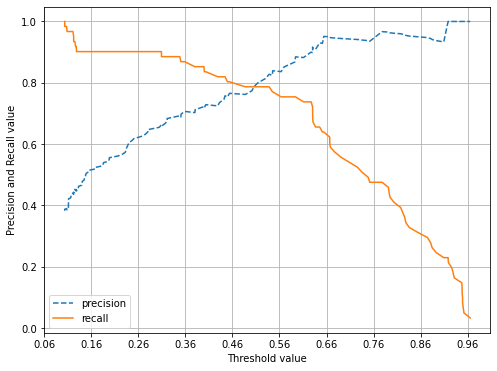

In [21]:
# 정밀도와 재현율의 상관관계 형태를 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # x 축을 threshold 값으로, y 축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x 축, y 축 label 과 legen, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()


precision_recall_curve_plot(y_test, lr.predict_proba(x_test)[:, 1])


### 정밀도와 재현율의 맹점

위 그래프에서 확인 가능하듯 임곗값을 증가시킬수록 재현율 값이 낮아지고, 정밀도 값은 높아짐.  
위 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.48 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임  
  
임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함  
  
  다음은 정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법이지만 숫자 놀음에 불과한 방법



## F1 Score

F1 스코어는 정밀도(Precision)와 재현율(Recall)이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 수치를 가짐

$F1 = \dfrac{2}{\dfrac{1}{recall} + \dfrac{1}{precision}} =  2 * \dfrac{precision * recall}{precision + recall}$

In [24]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어:{0:.4f}'.format(f1))

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    # F1 score 추가
    f1 = f1_score(y_test, pred)

    print('\n \n ################# ')
    print('오차행렬')
    print(confusion)
    print('\n 정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))


def get_eval_by_threshold1(y_test, pred_proba_c1, thresholds) :
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds :
        print('\n ######################')
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predcit = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        confusion = confusion_matrix(y_test, custom_predcit)
        accuracy = accuracy_score(y_test, custom_predcit)
        precision = precision_score(y_test, custom_predcit)
        recall = recall_score(y_test, custom_predcit)
        # F1 score 추가
        f1 = f1_score(y_test, custom_predcit)
        print('오차 행렬')
        print(confusion)
        print('\n 정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr.predict_proba(x_test)
get_eval_by_threshold1(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

F1 스코어:0.7805

 ######################
임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]

 정확도:0.8324, 정밀도:0.7183, 재현율:0.8361, F1: 0.7727

 ######################
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]

 정확도:0.8492, 정밀도:0.7656, 재현율:0.8033, F1: 0.7840

 ######################
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]

 정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1: 0.7805

 ######################
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]

 정확도:0.8659, 정밀도:0.8364, 재현율:0.7541, F1: 0.7931

 ######################
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]

 정확도:0.8771, 정밀도:0.8824, 재현율:0.7377, F1: 0.8036


## ROC 곡선과 AUC

- AUC : Area Under Curve
- ROC 곡선 (Receiver Operation Characteristic Curve) : 순 우리말로 수신자 판단 곡선
- FPR (False Posive Rate)이 변할 때 TPR (True Positive Rate)이 어떻게 변하는지를 나타내는 곡선
- FPR이 X 축, TPR 이 Y축
- TPR = Recall =  Sensitivity = TP / (FN + TP)
- TNR (True Negative Rate) = 특이성(Specificity) = TN / (FP + TN)
- FPR = FP / (FP + TN) = 1 - TNR = 1 - Specificity

**roc_curve() 주요 입력 파라미터와 반환 값**
- 입력 파라미터
 - y_true : 실제 클래스 값 array (array shape = [데이터건수])
 - y_score : predict_proba()의 반환값 array에서 Positive 컬럼의 예측 확률이 보통 사용됨. array shape = [n_samples]
- 반환 값
 - fpr : fpr 값을 array로 반환
 - tpr : tpr 값을 array로 반환
 - thresholds : thresholds 값 array



샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
 샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]


샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


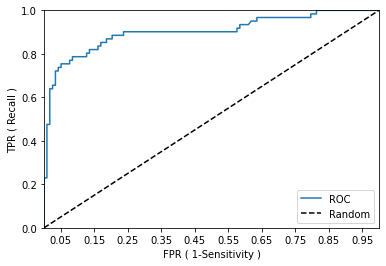

In [37]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
preo_proba_class1 = lr.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5step으로 추출
# thresholds[0] 은 max(예측확률) + 1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print(' 샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('\n')
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))


def roc_curve_plot(y_test, pred_proba_c1) :
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    # ROC 곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')

    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')

    # FPR X 축의 scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR ( 1-Sensitivity )'); plt.ylabel('TPR ( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])